In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context(context='notebook',font_scale=1.5)
from gru.cc_utils import _get_clip_labels
%matplotlib inline

## Cross Validation Results

In [2]:
with open('results/clip_tcn/roi_300_net_7_nw_wb_trainsize_100_kfold_5_batch_size_32_num_epochs_50_z_1_GSCV.pkl',"rb") as  f:
    results, params = pickle.load(f)

In [3]:
params

[{'k_hidden': 8, 'k_wind': 10},
 {'k_hidden': 8, 'k_wind': 50},
 {'k_hidden': 16, 'k_wind': 10},
 {'k_hidden': 16, 'k_wind': 50},
 {'k_hidden': 32, 'k_wind': 10},
 {'k_hidden': 32, 'k_wind': 50},
 {'k_hidden': 64, 'k_wind': 10},
 {'k_hidden': 64, 'k_wind': 50}]

In [4]:
df = pd.DataFrame.from_dict({(i,j): results[i][j] for i in results.keys()
                             for j in ['train','val']}).T

df.index.set_names(['model','dset'],inplace=True) 
df.reset_index(inplace=True)
df= df.melt(id_vars = ['model','dset'],var_name='fold',value_name='accuracy')
df.head()

,model,dset,fold,accuracy
0,model00,train,0,0.148889
1,model00,val,0,0.135460
2,model01,train,0,0.325383
3,model01,val,0,0.259724
4,model02,train,0,0.162314


Best val accuray of: 0.285


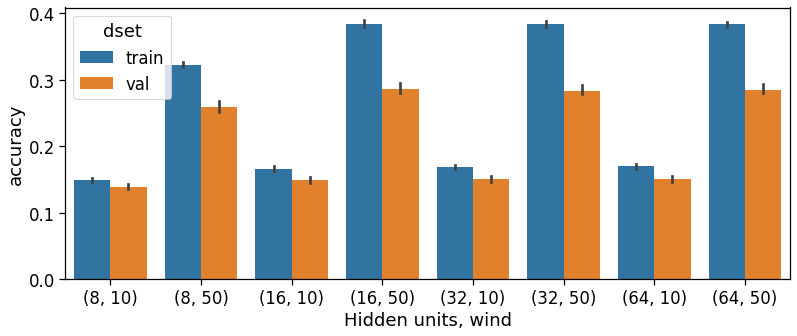

In [9]:
plt.figure(figsize=(13,5))
ax = sns.barplot(x='model',y='accuracy',data=df,hue='dset')
ax.set_xticklabels([(d['k_hidden'],d['k_wind']) for d in params])
ax.set_xlabel('Hidden units, wind')
acc = df[df['dset']=='val'].groupby('model').mean().sort_values(by='accuracy',ascending=False).iloc[0,0]
opt_model = df[df['dset']=='val'].groupby('model').mean().sort_values(by='accuracy',ascending=False).head(1).index.item()
print('Best val accuray of: %.3f' %(acc))

In [8]:
df.groupby(['model','dset'])['accuracy'].agg([np.mean, np.std]).sort_values(by='mean',ascending=False)

,,mean,std
model,dset,,
model03,train,0.384195,0.006500
model05,train,0.383271,0.006194
model07,train,0.383184,0.005386
model01,train,0.322667,0.004292
model03,val,0.285417,0.011419
model07,val,0.285002,0.009860
model05,val,0.283679,0.009927
model01,val,0.259362,0.010583
model06,train,0.169631,0.004428
